# <b id="section_2">  </b> <b style='color:#800080'>1. ספריות רלוונטיות </b> <b></b> 

In [258]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

# <b id="section_2">  </b> <b style='color:#800080'>2. מידע כללי על הדאטה </b> <b></b> 
#### מידע על הדאטה
מטרת הפרויקט שלנו היא לבחון סוגי אסונות טבע בעולם והשפעתן בהבטים מסוימים <br>נלקח מ:  [Kaggle](https://www.kaggle.com/datasets/brsdincer/all-natural-disasters-19002021-eosdis )

In [239]:
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

In [240]:
read_file.shape #return tupple of the rows, columns number.

(16126, 45)

In [241]:
read_file.columns #return all columns names into list

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [242]:
read_file #present the whole data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [243]:
read_file.info() #general information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [244]:
disaster_types = read_file['Disaster Type'].unique() #return list of each value in Disaster Type column
disaster_types

array(['Drought', 'Earthquake', 'Volcanic activity',
       'Mass movement (dry)', 'Storm', 'Flood', 'Epidemic', 'Landslide',
       'Wildfire', 'Extreme temperature ', 'Fog', 'Insect infestation',
       'Impact', 'Animal accident', 'Glacial lake outburst'], dtype=object)

In [245]:
first_year = read_file['Year'].iloc[0]
last_year = read_file['Year'].iloc[-1]
years = last_year - first_year
print('first year: ',first_year)
print('last year: ',last_year)
print('Total: ',years)

first year:  1900
last year:  2021
Total:  121


In [246]:
read_file.isnull().sum() # מראה כמה ערכים חסרים יש לנו בכל עמודה

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [247]:
read_file.dtypes #מראה את הסוג של כל נתון

Year                            int64
Seq                             int64
Glide                          object
Disaster Group                 object
Disaster Subgroup              object
Disaster Type                  object
Disaster Subtype               object
Disaster Subsubtype            object
Event Name                     object
Country                        object
ISO                            object
Region                         object
Continent                      object
Location                       object
Origin                         object
Associated Dis                 object
Associated Dis2                object
OFDA Response                  object
Appeal                         object
Declaration                    object
Aid Contribution              float64
Dis Mag Value                 float64
Dis Mag Scale                  object
Latitude                       object
Longitude                      object
Local Time                     object
River Basin 

# <b id="section_2">  </b> <b style='color:#800080'>3. יחס בין אסונות שכיחים לבין כמות הרוגים  </b> <b></b> 

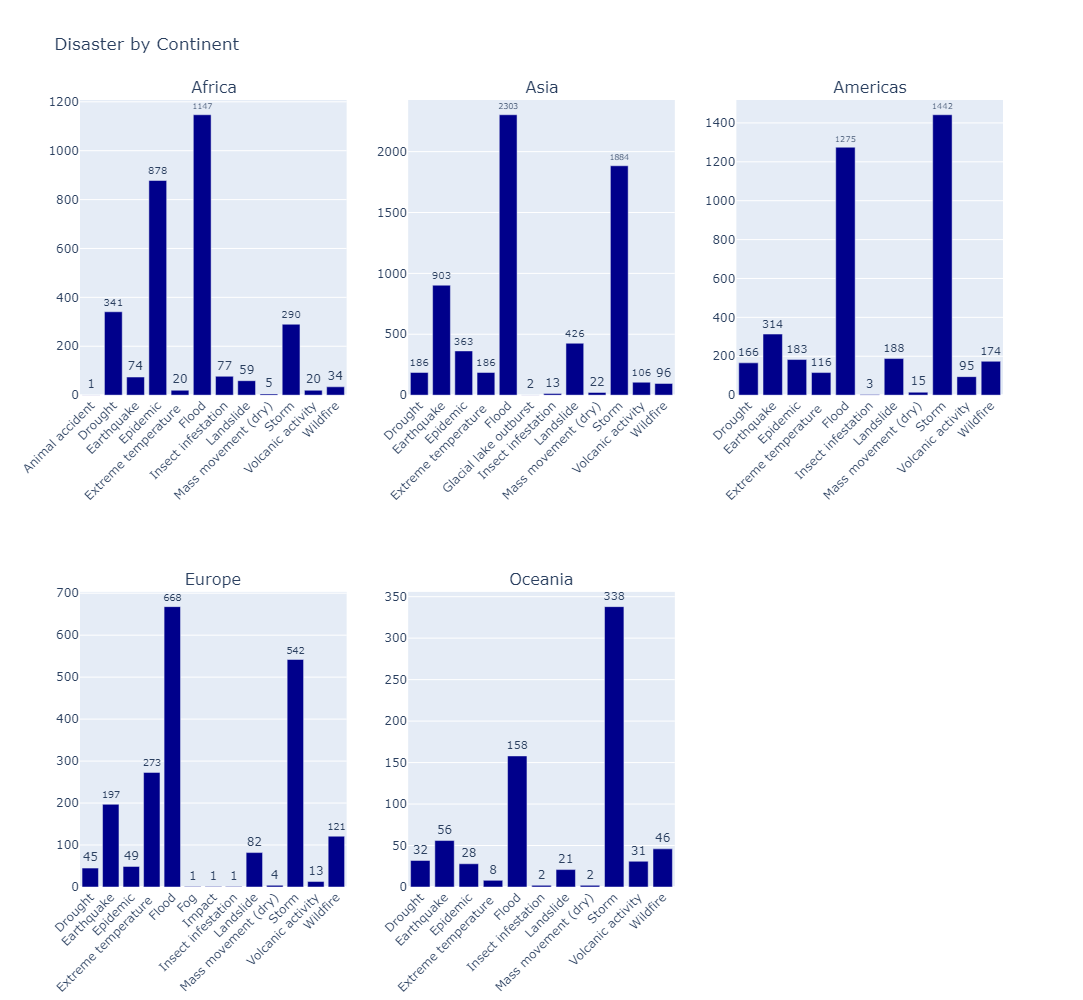

In [248]:
# קיבוץ וספירת האסונות לפי יבשת וסוג האסון
continent_disaster_counts = read_file.groupby(['Continent', 'Disaster Type']).size().reset_index(name='Count')
# קבלת רשימת היבשות
continents = read_file['Continent'].unique()
# יצירת פסקה עם שני שורות ומספר עמודות הצגה קבוע
fig = make_subplots(rows=2, cols=3, subplot_titles=continents)
# תרשימים נפרדים לכל יבשת והוסף אותם לפסקה
for i, continent in enumerate(continents):
    continent_data = continent_disaster_counts[continent_disaster_counts['Continent'] == continent]

    # יצירת גרף עמודות באמצעות Plotly
    fig.add_trace(go.Bar(
            x=continent_data['Disaster Type'], 
            y=continent_data['Count'],
            text=continent_data['Count'],  # הוספת ערכי הספירות על העמודות
            marker_color='darkblue',  
            textposition='outside',
            name=f'Disaster Distribution in {continent}'),
        row=(i // 3) + 1 ,
        col=(i % 3) + 1) 
# עיצוב והוספת כותרת וערכים
fig.update_layout(
    title_text='Disaster by Continent',
    height=1000,
    showlegend=False)
fig.update_xaxes(tickangle=-45)

#### מסקנה מהגרף: ניתן לראות שיש שני סוגי אסונות שכיחים ובולטים בכל היבשות - סופות והצפות

#### ננתח מספר מתים בכל אסון :

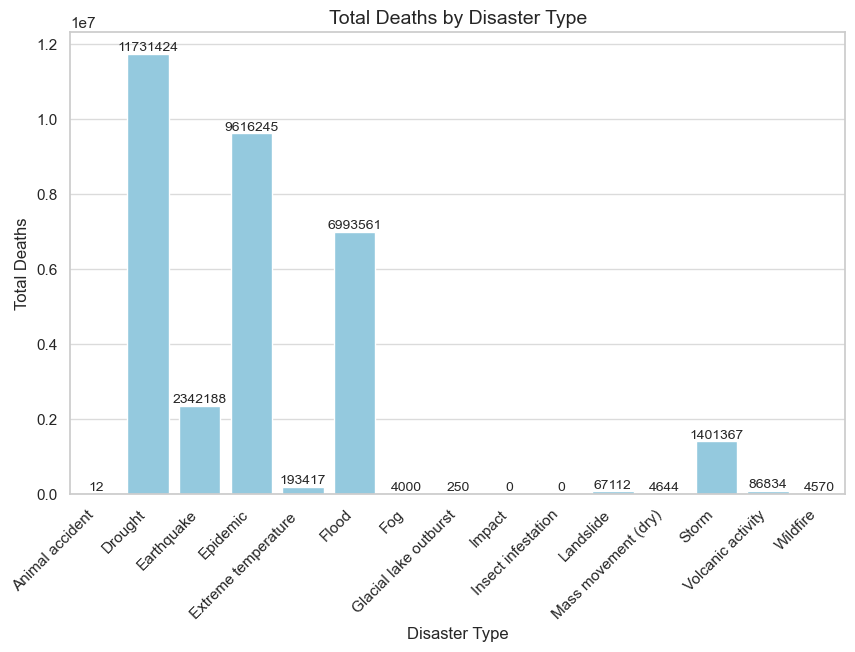

In [249]:
deaths_per_disaster = read_file.groupby('Disaster Type')['Total Deaths'].sum().reset_index()

# Setting up the plot
plt.figure(figsize=(10, 6))

# Creating bar plot
sns.barplot(data=deaths_per_disaster, x='Disaster Type', y='Total Deaths', color='skyblue')

# Adding numbers to the bars
for index, row in deaths_per_disaster.iterrows():
    plt.text(index, int(row['Total Deaths']) + 1000, int(row['Total Deaths']), ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.title('Total Deaths by Disaster Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='-', alpha=0.7)  

#### מסקנה מהגרף: ניתן לראות שקיים פער משמעותי בשכיחות אסון ה'בצורת' לבין מספר ההרוגים הגבוה באסון זה

In [250]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# סינון נתונים לאסונות בצורת
drought_data = read_file[read_file['Disaster Type'] == 'Drought']

# קיבוץ לפי יבשות וסיכום כמות המתים
drought_deaths_by_continent = drought_data.groupby('Continent')['Total Deaths'].sum().reset_index()

# קיבוץ לפי יבשות וספירת מספר האירועים
drought_events_by_continent = drought_data['Continent'].value_counts().reset_index()
drought_events_by_continent.columns = ['Continent', 'Number of Events']

# יצירת גרף עמודות עבור כמות המתים
fig_deaths = px.bar(drought_deaths_by_continent, x='Continent', y='Total Deaths', 
                    title='Total Deaths Due to Droughts by Continent',
                    labels={'Total Deaths': 'Number of Deaths', 'Continent': 'Continents'},
                    text='Total Deaths',
                    width=600, height=400)

# הוספת הערכים כטקסט על העמודות
fig_deaths.update_traces(texttemplate='%{text:.0f}', textposition='outside', marker_color='darkblue')

# התאמת כותרת ציר ה-Y
fig_deaths.update_yaxes(title_text='Number of Deaths', tickformat=',d')

# יצירת גרף עמודות עבור מספר האירועים
fig_events = px.bar(drought_events_by_continent, x='Continent', y='Number of Events', 
                    title='Number of Drought Events by Continent',
                    labels={'Number of Events': 'Number of Events', 'Continent': 'Continents'},
                    text='Number of Events',
                    width=600, height=400)

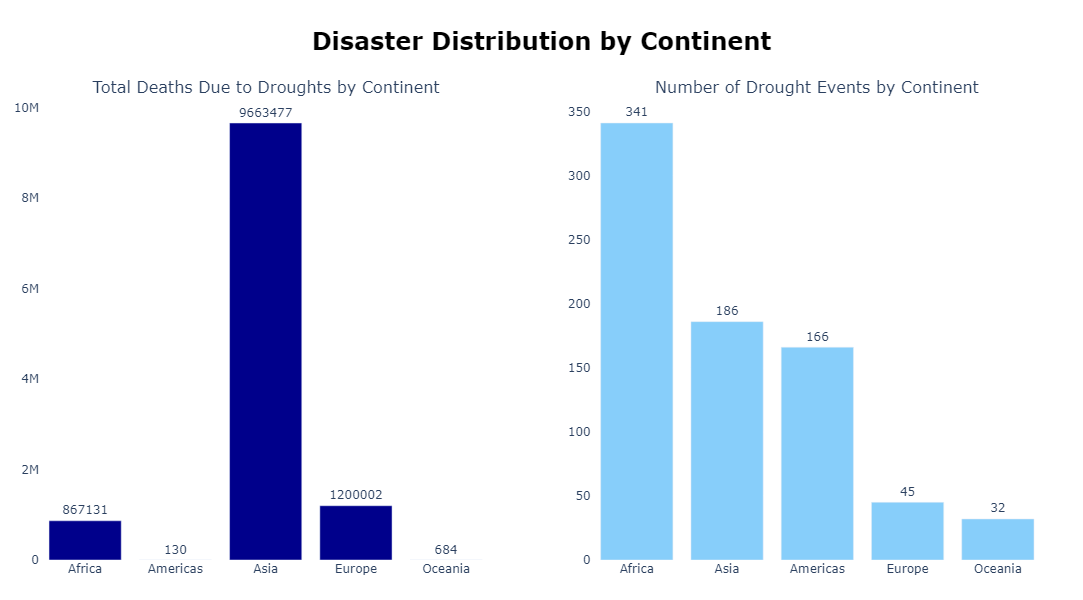

In [251]:
# הוספת הערכים כטקסט על העמודות
fig_events.update_traces(texttemplate='%{text:.0f}', textposition='outside', marker_color='lightskyblue')

# התאמת כותרת ציר ה-Y
fig_events.update_yaxes(title_text='Number of Events', tickformat=',d')

# יצירת גרף אחד המשלב את שני הגרפים
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Deaths Due to Droughts by Continent', 'Number of Drought Events by Continent'))

# הוספת גרף כמות המתים
fig.add_trace(fig_deaths['data'][0], row=1, col=1)

# הוספת גרף מספר האירועים
fig.add_trace(fig_events['data'][0], row=1, col=2)

# התאמת עיצוב הגרף הכולל
fig.update_layout(title_text='<b style="color:black; font-size:24px;">Disaster Distribution by Continent</b>',
                  showlegend=False, width=1200, height=600,
                  margin=dict(t=100, b=40, l=40, r=40),
                  title_x=0.5,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(size=12))

#### מסקנה מעניינת שניתן להסיק מגרפים אלו:

מהגרפים ניתן לראות כי יבשת אסיה סובלת מהמספר הגבוה ביותר של מתים בעקבות בצורת, עם כמות משמעותית של יותר מתשעה מיליון מתים. עם זאת, מספר האירועים שקרו באסיה הוא לא בהכרח הגבוה ביותר ביחס למספר זה. זאת לעומת יבשת אפריקה, שגם בה יש כמות גבוהה של מתים, אך מספר האירועים בה הוא גדול יותר.

זה מצביע על כך שבאסיה כל אירוע בצורת הוא חמור הרבה יותר מבחינת כמות המתים בהשוואה לאפריקה, ואילו באפריקה יש יותר אירועים, אך כל אירוע פוגע בכמות פחותה יותר של אנשים.

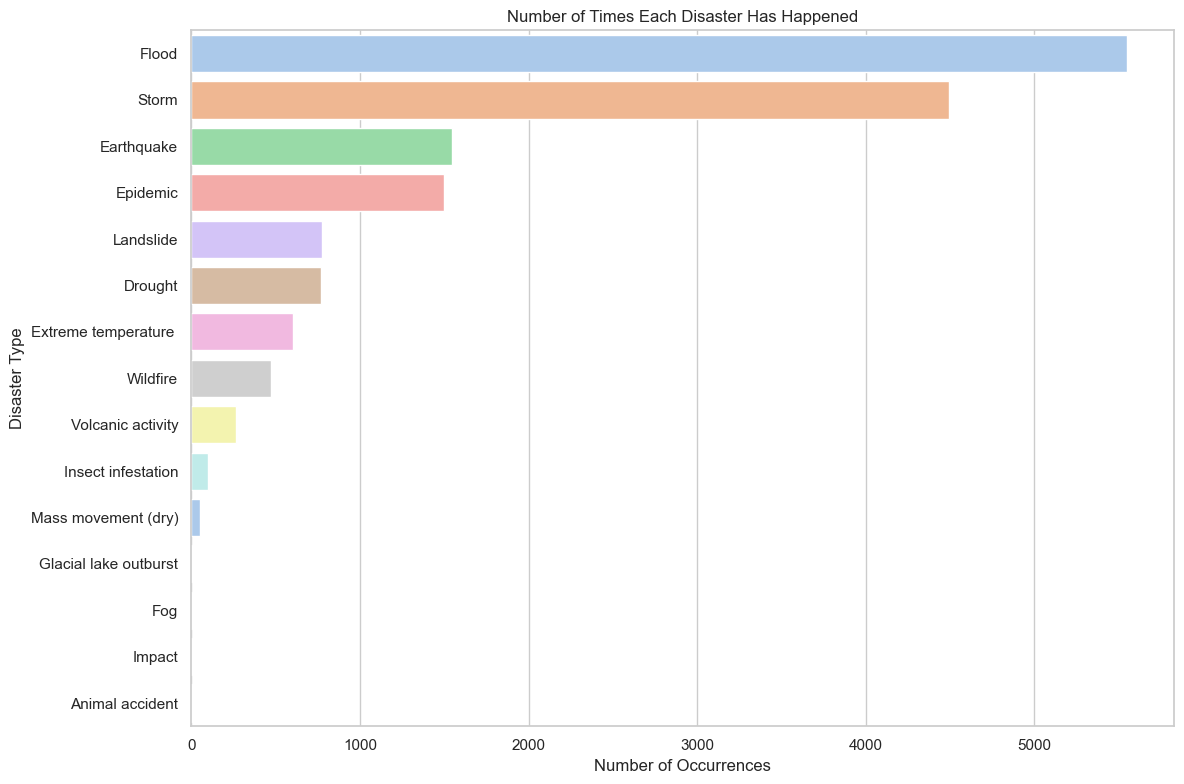

In [252]:
# חישוב מספר ההתרחשויות של כל סוג אסון
disaster_counts = read_file['Disaster Type'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette="pastel")
plt.title('Number of Times Each Disaster Has Happened')
plt.xlabel('Number of Occurrences')
plt.ylabel('Disaster Type')
plt.tight_layout()

In [253]:
full_fields_count = read_file['Total Damages (\'000 US$)'].notnull().sum()
print("Number of full fields in 'Total Damages (\'000 US$)':", full_fields_count)

Number of full fields in 'Total Damages ('000 US$)': 5245


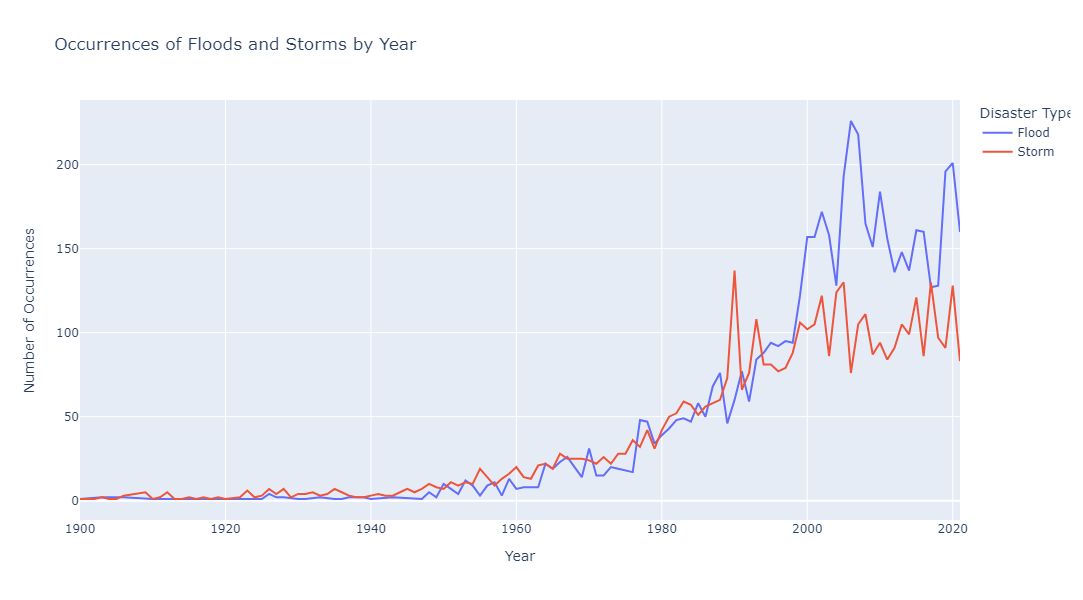

In [254]:
filtered_data = read_file[read_file['Disaster Type'].isin(['Flood', 'Storm'])]

# חישוב מספר ההופעות לפי שנים וסוגי אסונות
counts_per_year = filtered_data.groupby(['Year', 'Disaster Type']).size().reset_index(name='Counts')

# יצירת גרף קווי באמצעות Plotly
fig = px.line(counts_per_year, x='Year', y='Counts', color='Disaster Type',
              title='Occurrences of Floods and Storms by Year',
              labels={'Year': 'Year', 'Counts': 'Number of Occurrences', 'Disaster Type': 'Disaster Type'})

# התאמת גודל הגרף
fig.update_layout(width=1000, height=600)

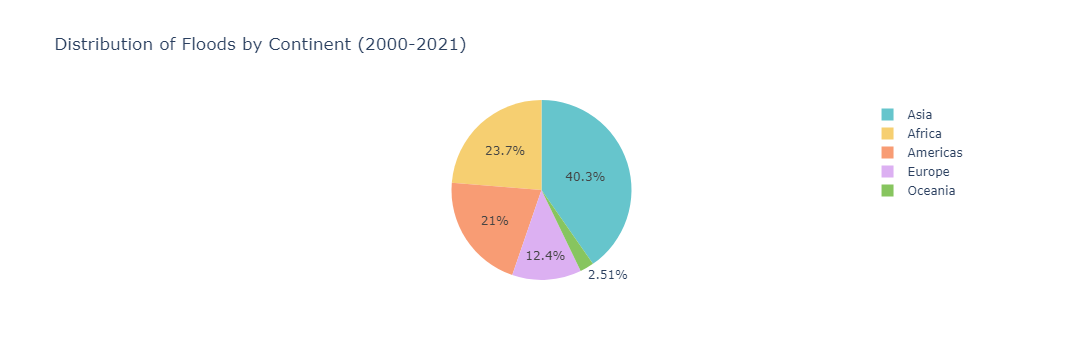

In [255]:
filtered_data = read_file[(read_file['Disaster Type'] == 'Flood') & (read_file['Year'] >= 2000)]

# חישוב מספר ההצפות לפי יבשת
counts_per_continent = filtered_data['Continent'].value_counts().reset_index()
counts_per_continent.columns = ['Continent', 'Counts']

# יצירת גרף פאי באמצעות Plotly
fig = px.pie(counts_per_continent, values='Counts', names='Continent', 
             title='Distribution of Floods by Continent (2000-2021)',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# הצגת הגרף
fig.show()

In [261]:
## יצירת מילון של עונות
season_dict = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# פונקציה למיפוי חודש לעונה
def map_month_to_season(month):
    for season, months in season_dict.items():
        if month in months:
            return season
    return None

# יצירת עמודת עונה
read_file['Season'] = read_file['Start Month'].apply(map_month_to_season)

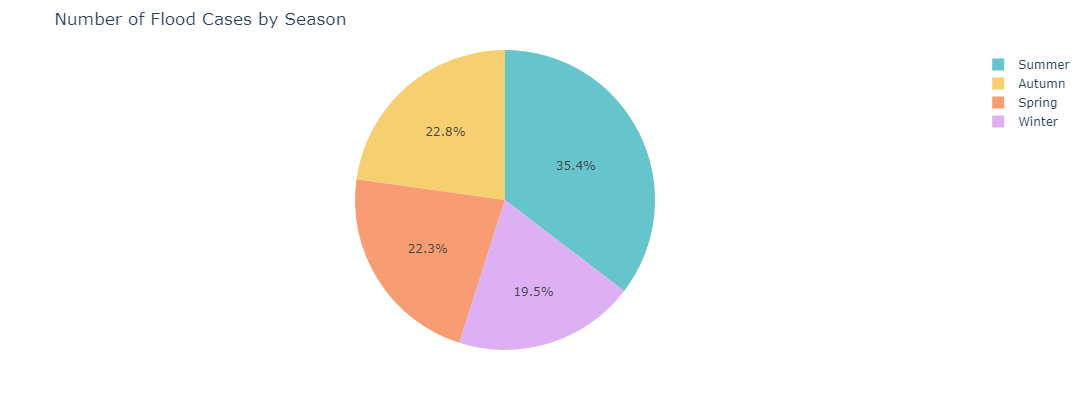

In [263]:
# יצירת עמודת עונה
read_file['Season'] = read_file['Start Month'].apply(map_month_to_season)

# סינון נתונים עבור סוג אסון Flood
df_flood = read_file[read_file['Disaster Type'] == 'Flood']
season_counts = df_flood['Season'].value_counts()

fig = px.pie(values=season_counts.values, names=season_counts.index, title='Flood Cases by Season', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Number of Flood Cases by Season', width=400, height=400,margin=dict(l=50, r=50, t=50, b=50), showlegend=True)